# Q1
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
startup_data=pd.read_csv('D:\\50_Startups.csv')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [228]:
startup_data.shape

(50, 5)

In [176]:
startup_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [177]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
startup_data['State'] = startup_data['State'].astype('category')

In [6]:
startup_data.groupby('State')['Profit'].sum()

State
California    1766387.98
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

In [233]:
#getting dummy variables for state column
startup_data = pd.get_dummies(startup_data)
startup_data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [234]:
startup_data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


## Assumption check
Normality test

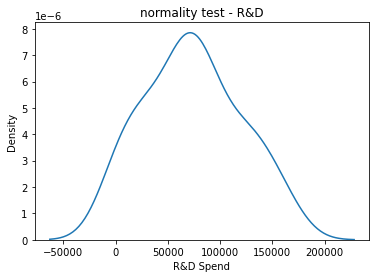

In [235]:
sns.distplot(a=startup_data['R&D Spend'],hist=False)
plt.title('normality test - R&D')
plt.show()

In [236]:
startup_data['R&D Spend'].skew()

0.164002172321177

In [237]:
startup_data['R&D Spend'].kurt()

-0.7614645568424674

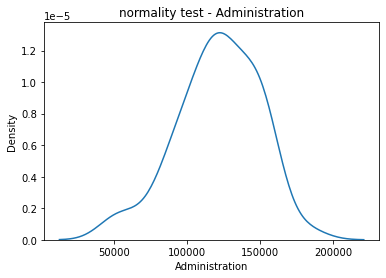

In [238]:
sns.distplot(a=startup_data['Administration'],hist=False)
plt.title('normality test - Administration')
plt.show()

In [239]:
startup_data['Administration'].skew()

-0.4890248099671768

In [240]:
startup_data['Administration'].kurt()

0.22507113536865386

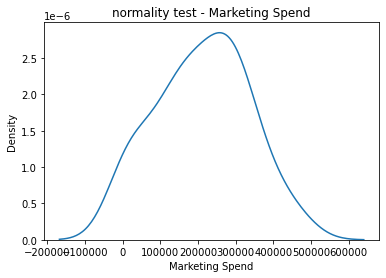

In [241]:
sns.distplot(a=startup_data['Marketing Spend'],hist=False)
plt.title('normality test - Marketing Spend')
plt.show()

In [242]:
startup_data['Marketing Spend'].skew()

-0.04647226758360412

In [243]:
startup_data['Marketing Spend'].kurt()

-0.6717011281297514

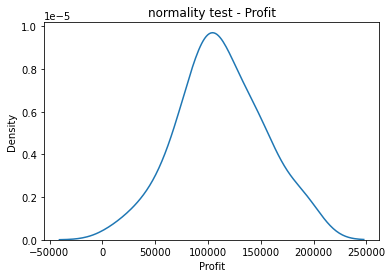

In [244]:
sns.distplot(a=startup_data['Profit'],hist=False)
plt.title('normality test - Profit')
plt.show()

In [245]:
startup_data['Profit'].skew()

0.023291019769116614

In [246]:
startup_data['Profit'].kurt()

-0.06385888546853113

## Normality test using probplot

In [190]:
from scipy import stats

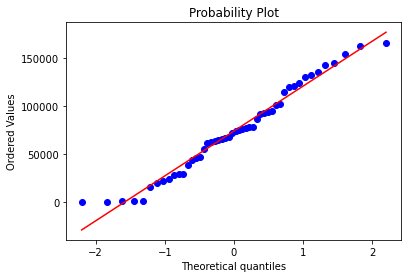

In [247]:
stats.probplot(x=startup_data['R&D Spend'],dist='norm',plot=plt)
plt.show()

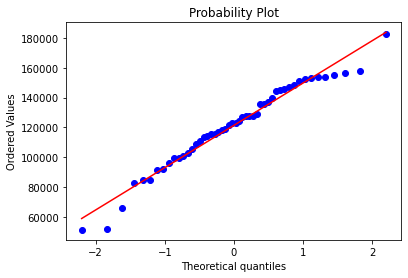

In [248]:
stats.probplot(x=startup_data['Administration'],dist='norm',plot=plt)
plt.show()

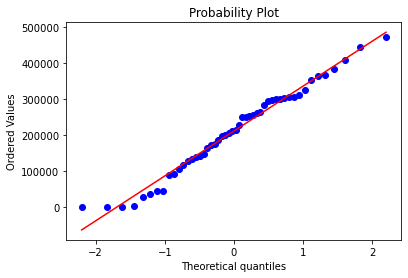

In [249]:
stats.probplot(x=startup_data['Marketing Spend'],dist='norm',plot=plt)
plt.show()

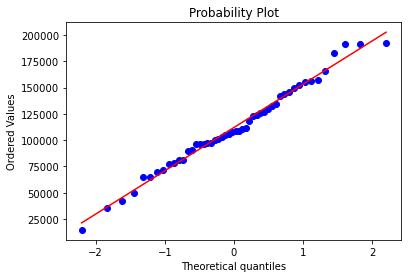

In [250]:
stats.probplot(x=startup_data['Profit'],dist='norm',plot=plt)
plt.show()

### Normality test is Passed

## Test 2 Linearity Test
lm plot or scatter plot we can use

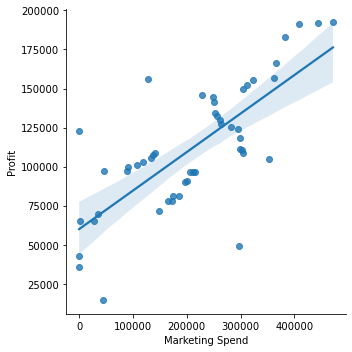

In [251]:
sns.lmplot(x='Marketing Spend',y='Profit',data=startup_data)
plt.show()
#failed

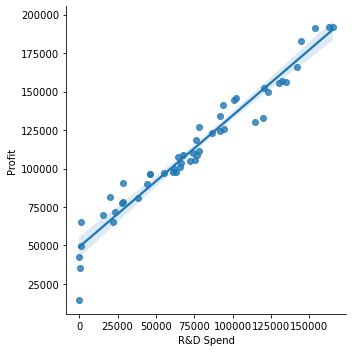

In [252]:
sns.lmplot(x='R&D Spend',y='Profit',data=startup_data)
plt.show()
#failed

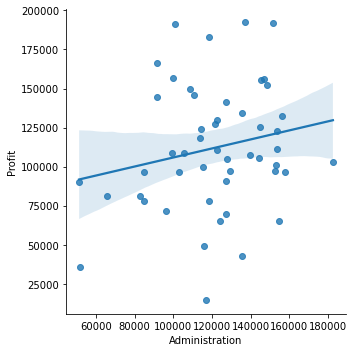

In [253]:
sns.lmplot(x='Administration',y='Profit',data=startup_data)
plt.show()
#failed

In [254]:
##Linearity Test failed

## 3 MULTI COLINEARITY TEST
can be perfrormed by using co relation matrix and Variance inflation factor(VIF)

In [256]:
startup_data_corr_matrix=startup_data.corr().round(2)
startup_data_corr_matrix

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.00,0.24,0.72,0.97,-0.14,0.11,0.04
Administration,0.24,1.00,-0.03,0.20,-0.02,0.01,0.01
Marketing Spend,0.72,-0.03,1.00,0.75,-0.17,0.21,-0.03
Profit,0.97,0.20,0.75,1.00,-0.15,0.12,0.03
State_California,-0.14,-0.02,-0.17,-0.15,1.00,-0.49,-0.52
State_Florida,0.11,0.01,0.21,0.12,-0.49,1.00,-0.49
State_New York,0.04,0.01,-0.03,0.03,-0.52,-0.49,1.00


<AxesSubplot:>

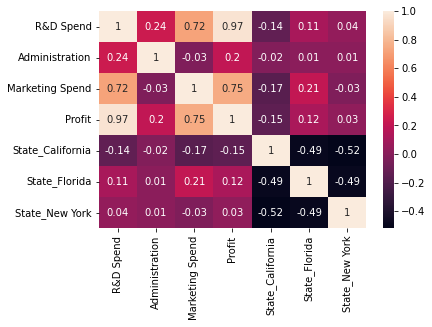

In [261]:
sns.heatmap(data=startup_data_corr_matrix,annot=True)

In [206]:
#multi colinearity problem Exist

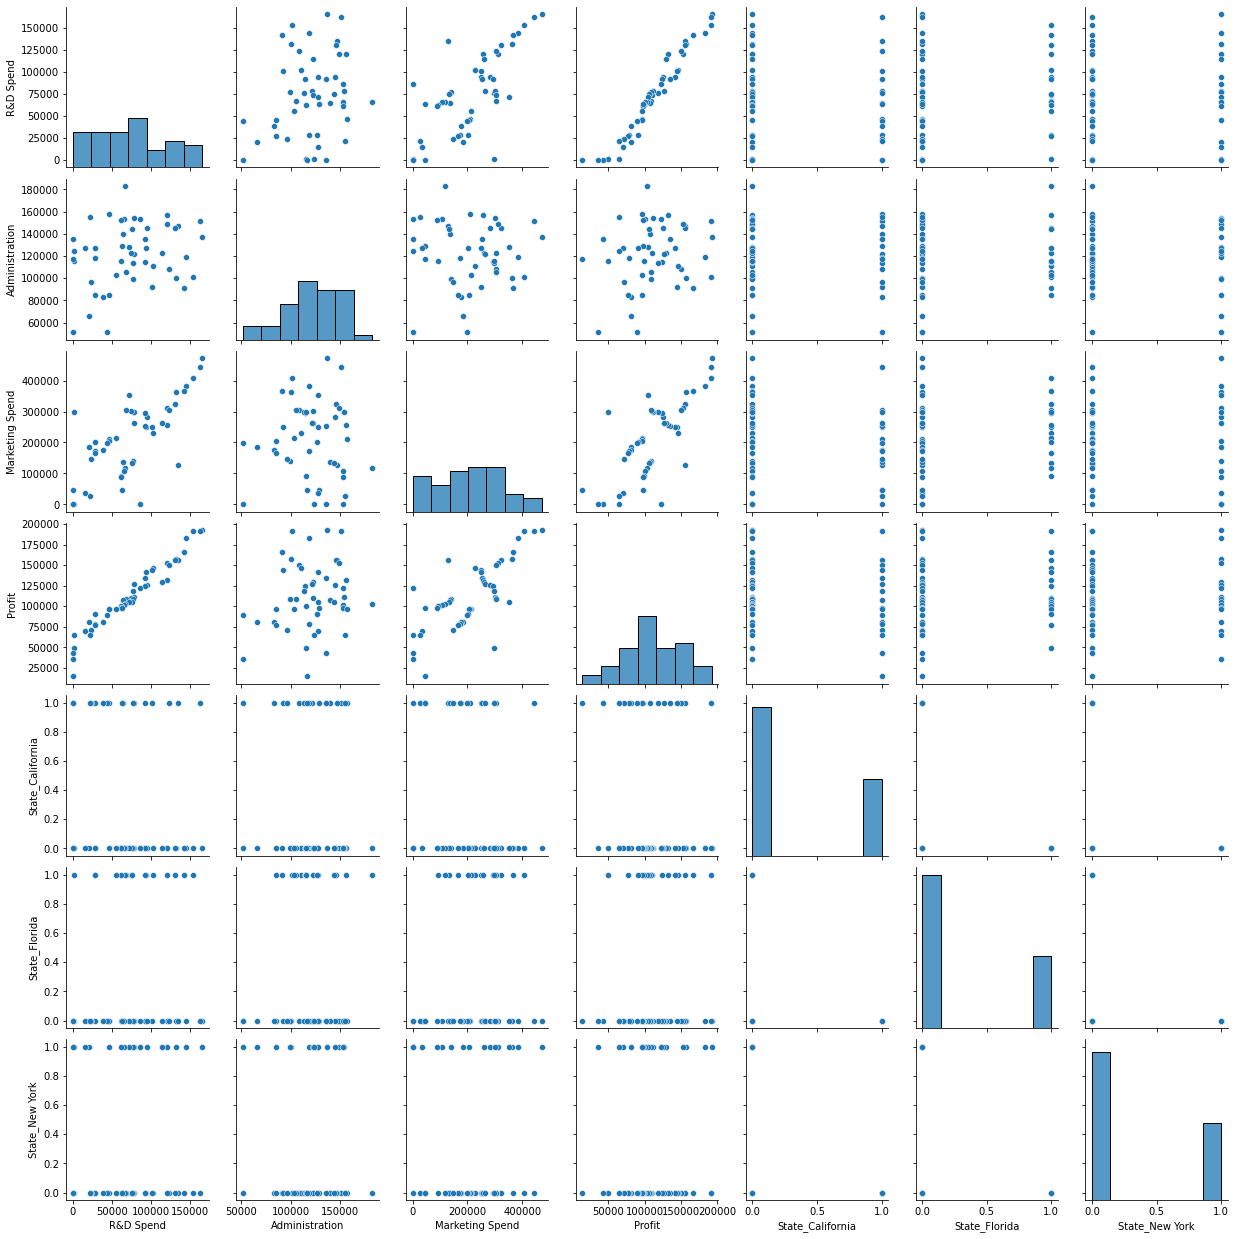

In [259]:
sns.pairplot(startup_data)

####  
marketing spend and R&D spend have a high correlation
Florida state is less correlated with profit compared to other independant vairables , followed by Administration
R&D spend has the highest correlation profit

In [264]:
#defining independant (x) and dependant variables(y)
Y = startup_data['Profit']
X = startup_data.loc[ : , startup_data.columns != 'Profit']

In [265]:
X

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


In [266]:
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [267]:
startup_data.rename({'Marketing Spend' : 'Marketing'} , axis = 1 , inplace = True)
startup_data.rename({'Administration' : 'Admin'} , axis = 1 , inplace = True)
startup_data.rename({'State_California' : 'SC'} , axis = 1 , inplace = True)
startup_data.rename({'State_Florida' : 'SF'} , axis = 1 , inplace = True)
startup_data.rename({'R&D Spend' : 'RD'} , axis = 1 , inplace = True)
startup_data

,RD,Admin,Marketing,Profit,SC,SF,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


### Builidng the model
MODEL 1

In [269]:
model = smf.ols('Profit~RD+Admin+Marketing+SC+SF',data = startup_data).fit()

In [270]:
model.rsquared

0.9507524843355148

###### MODEL 2

In [272]:
model_2 = smf.ols('Profit~RD+Admin+Marketing',data = startup_data).fit()
model_2.rsquared

0.9507459940683246

In [276]:
model_2 = smf.ols('Profit~RD+Admin+Marketing+SC+SF',data = startup_data).fit()

In [277]:
model_2.fittedvalues

0     192390.571364
1     189071.320106
2     182276.186735
3     173584.976191
4     172277.133819
5     163473.807120
6     158099.292788
7     160155.644651
8     151634.743327
9     154829.662529
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236605
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746174
41     74956.311047
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232003
48     49123.073082
49     48185.038791


In [278]:
model_2.pvalues

Intercept    5.757175e-09
RD           2.578772e-21
Admin        6.077373e-01
Marketing    1.226769e-01
SC           9.897941e-01
SF           9.428623e-01
dtype: float64

In [280]:
np.round(model.pvalues['Admin'] , 4)

0.6077

In [281]:
np.round(model.pvalues['Marketing'] , 4)

0.1227

In [282]:
np.round(model.pvalues['SC'] , 4)

0.9898

In [283]:
np.round(model.pvalues['SF'] , 4)

0.9429

### building linear models with those variables whose P value greater than 0.05 and profit

In [286]:
model_3 = smf.ols('Profit~Admin' , data = startup_data).fit()
model_3.rsquared

0.04028714077757245

<AxesSubplot:xlabel='Admin', ylabel='Profit'>

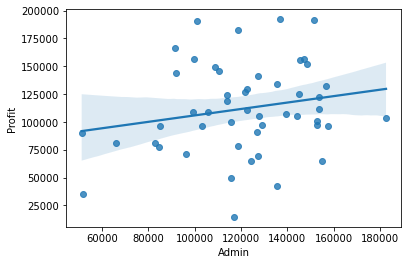

In [287]:
sns.regplot(x = 'Admin' , y = 'Profit' , data = startup_data)

In [290]:
model_4= smf.ols('Profit~Marketing' , data = startup_data).fit()

In [291]:
model_4.rsquared

0.5591535746115515

<AxesSubplot:xlabel='Marketing', ylabel='Profit'>

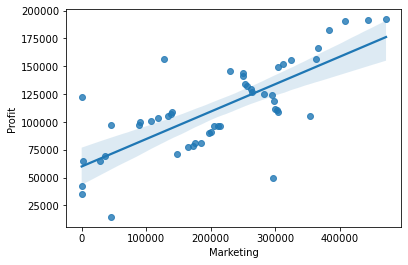

In [292]:
sns.regplot(x = 'Marketing' , y = 'Profit' , data = startup_data)

In [293]:
model_5 = smf.ols('Profit~SF' , data = startup_data).fit()

In [294]:
model_5.rsquared

0.013512728677721686

### Validation methods
1. checking vif factor

In [295]:
R_RD = smf.ols('RD~Admin+Marketing+SC' , data = startup_data).fit().rsquared
vif_RD = 1/(1-R_RD)
vif_RD

2.4703745766185436

In [296]:
R_Admin = smf.ols('Admin~RD+Marketing+SC' , data = startup_data).fit().rsquared
vif_Admin = 1/(1-R_Admin)
vif_Admin

1.1752133425747462

In [297]:
R_M = smf.ols('Marketing~RD+Admin+SC' , data = startup_data).fit().rsquared
vif_M = 1/(1-R_M)
vif_M

2.3475090136376275

In [298]:
R_SC = smf.ols('SC~RD+Admin+Marketing' , data = startup_data).fit().rsquared
vif_SC = 1/(1-R_SC)
vif_SC

1.0304337121541791

In [299]:
vif_table = pd.DataFrame({'X_variables': ['RD' , 'Admin' , 'Marketing' , 'SC'] , 'vif':['2.47' , '1.17' , '2.34' , '1.03']})

In [300]:
vif_table

,X_variables,vif
0,RD,2.47
1,Admin,1.17
2,Marketing,2.34
3,SC,1.03


In [301]:
#All vif factors seems to be at a good level , so we can be confident that multi collinearity is not a problem in our model


### 2. checking normality of residuals

In [302]:
model.resid

0     15982.718919
1     22385.605990
2     30507.594512
3     28455.344702
4     15938.791726
5      7557.027301
6     64641.967669
7     15926.642859
8     15408.238938
9     14590.865448
10    29639.562007
11    22703.993091
12    20006.726571
13    12032.188384
14     9379.115599
15     5396.314088
16     1838.845676
17    -4276.235411
18    -8422.309110
19    62773.311184
20   -15138.144409
21   -22563.560837
22   -24407.140529
23   -26382.635839
24    13902.526911
25    13398.625337
26    12692.109533
27   -42040.660844
28    14160.112716
29    14595.844855
30    17473.902805
31    15737.811107
32    26066.154367
33   -16123.366214
34   -15243.787512
35   -14175.765202
36   -18864.926934
37   -18614.134744
38   -24434.789090
39   -22127.987573
40   -24350.732544
41   -22740.049026
42   -24981.303524
43      997.705783
44    -1786.573065
45     4453.289997
46   -83739.410085
47   -17443.818816
48   -24330.138816
49   -56455.467956
dtype: float64

In [303]:
import statsmodels.api as sm

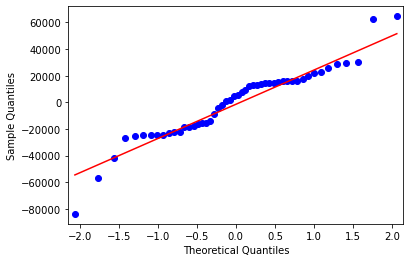

In [304]:
qqplot = sm.qqplot(model.resid , line = 'q')

<AxesSubplot:>

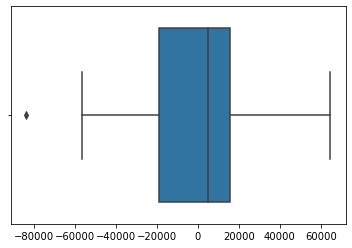

In [305]:
sns.boxplot(model.resid)

### FINAL MODEL 1

In [308]:
model_6 = smf.ols('Profit~RD+Admin+Marketing+SC',data = startup_data).fit()

In [309]:
model_6.rsquared

0.9507466686514052

In [310]:
R1 = pd.DataFrame({'Model no.' : '1' , 'R_squared' : '0.962'} , index = [0])

In [311]:
R1

,Model no.,R_squared
0,1,0.962


In [312]:
model_6.fittedvalues

0     192532.226992
1     189098.489743
2     182161.538806
3     173711.945790
4     172155.843026
5     163597.411279
6     158068.972123
7     160038.959669
8     151760.002581
9     154833.465023
10    135531.546985
11    135525.494778
12    129159.782822
13    127439.328603
14    149569.011376
15    146255.913220
16    116866.855358
17    130212.645784
18    129034.428443
19    115666.547714
20    116589.931104
21    117339.317587
22    114727.234628
23    110017.212986
24    113389.785794
25    102194.236252
26    110627.110633
27    114426.366370
28    101686.934555
29    101822.720529
30     99481.322542
31     97716.458840
32     98961.591468
33     97939.487365
34     88993.213221
35     90536.932161
36     75311.609340
37     89575.469725
38     69724.515653
39     83685.540970
40     74772.375346
41     74829.994623
42     70578.233334
43     60199.289505
44     64573.115628
45     47684.653682
46     56188.803369
47     46454.321036
48     49206.425349
49     48177.346284


In [313]:
model_6.resid

0      -270.396992
1      2693.570257
2      8888.851194
3      9190.044210
4     -5967.903026
5     -6606.291279
6     -1946.462123
7     -4286.359669
8       451.767419
9     -5073.505023
10    10590.403015
11     8733.905222
12    12425.737178
13     6868.021397
14   -16966.361376
15   -16338.873220
16    10126.074642
17    -4842.275784
18    -4767.528443
19     7110.312286
20     1884.098896
21    -6026.297587
22    -4374.984628
23    -1283.222986
24    -4837.745794
25     5210.103748
26    -4893.570633
27    -9418.056370
28     1595.445445
29     -818.080529
30      456.267458
31     -232.898840
32    -1533.751468
33    -1160.567365
34     7719.586779
35     5942.577839
36    15396.580660
37      373.670275
38    11504.544347
39    -2679.780970
40     3467.534654
41     2968.835377
42      920.256666
43     9559.690495
44      627.214372
45    17241.426318
46    -6698.053369
47    -3894.591036
48   -13533.015349
49   -33495.946284
dtype: float64

In [315]:
startup_data['Predicted'] = model.fittedvalues
startup_data['Errors'] = model.resid

In [316]:
startup_data

,RD,Admin,Marketing,Profit,SC,SF,State_New York,Predicted,Errors
0,165349.20,136897.80,471784.10,192261.83,0,0,1,192532.226992,-270.396992
1,162597.70,151377.59,443898.53,191792.06,1,0,0,189098.489743,2693.570257
2,153441.51,101145.55,407934.54,191050.39,0,1,0,182161.538806,8888.851194
3,144372.41,118671.85,383199.62,182901.99,0,0,1,173711.945790,9190.044210
4,142107.34,91391.77,366168.42,166187.94,0,1,0,172155.843026,-5967.903026
5,131876.90,99814.71,362861.36,156991.12,0,0,1,163597.411279,-6606.291279
6,134615.46,147198.87,127716.82,156122.51,1,0,0,158068.972123,-1946.462123
7,130298.13,145530.06,323876.68,155752.60,0,1,0,160038.959669,-4286.359669
8,120542.52,148718.95,311613.29,152211.77,0,0,1,151760.002581,451.767419
9,123334.88,108679.17,304981.62,149759.96,1,0,0,154833.465023,-5073.505023


<AxesSubplot:>

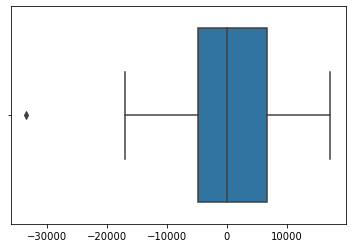

In [317]:
#checking normality of residuals again
sns.boxplot(model_6.resid)

### FINAL MODEL 2

In [319]:
sq_x = np.sqrt(startup_data[['RD', 'Marketing', 'Admin', 'SC']])

In [320]:
model_7 = smf.ols('Profit~sq_x',data = startup_data).fit()

In [321]:
model_7.rsquared

0.9079852020468029

In [322]:
R2 = pd.DataFrame({'Model no.' : '2' , 'R_squared' : '0.896'} , index = [0])

In [323]:
R2

,Model no.,R_squared
0,2,0.896


In [324]:
#Final MODEL 3

In [326]:
sq_y = np.sqrt(startup_data['Profit'])

In [328]:
model_8 = smf.ols('sq_y~RD+Admin+Marketing+SC',data = startup_data).fit()

In [329]:
model_8.rsquared

0.8960351071379633

In [330]:
R3 = pd.DataFrame({'Model no.' : '3' , 'R_squared' : '0.945'} , index = [0])

In [331]:
R3

,Model no.,R_squared
0,3,0.945


In [332]:
#final model 4

In [334]:
model_9 = smf.ols('sq_y~sq_x',data = startup_data).fit()

In [335]:
model_9.rsquared

0.9311143053322222

In [336]:
R4 = pd.DataFrame({'Model no.' : '4' , 'R_squared' : '0.938'} , index = [0])

In [337]:
R4

,Model no.,R_squared
0,4,0.938


In [338]:
### Concluding that Final model 1 is the best model as it gives highest R squared value

# Q2
## Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [157]:
toyota=pd.read_csv('D:\\ToyotaCorolla.csv',encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


## EDA

In [158]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [159]:
toyo2=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyo2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [160]:
toyo3=toyo2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [161]:
toyo3[toyo3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [162]:
toyo4=toyo3.drop_duplicates().reset_index(drop=True)
toyo4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [163]:
toyo4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Correlation Analysis

In [164]:
data2=toyo4.corr().round(2)

<AxesSubplot:>

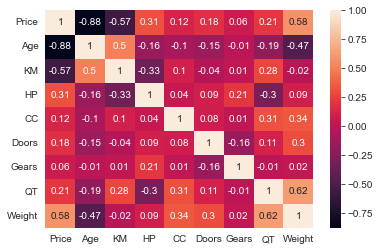

In [165]:
sns.heatmap(data=data2,annot=True)

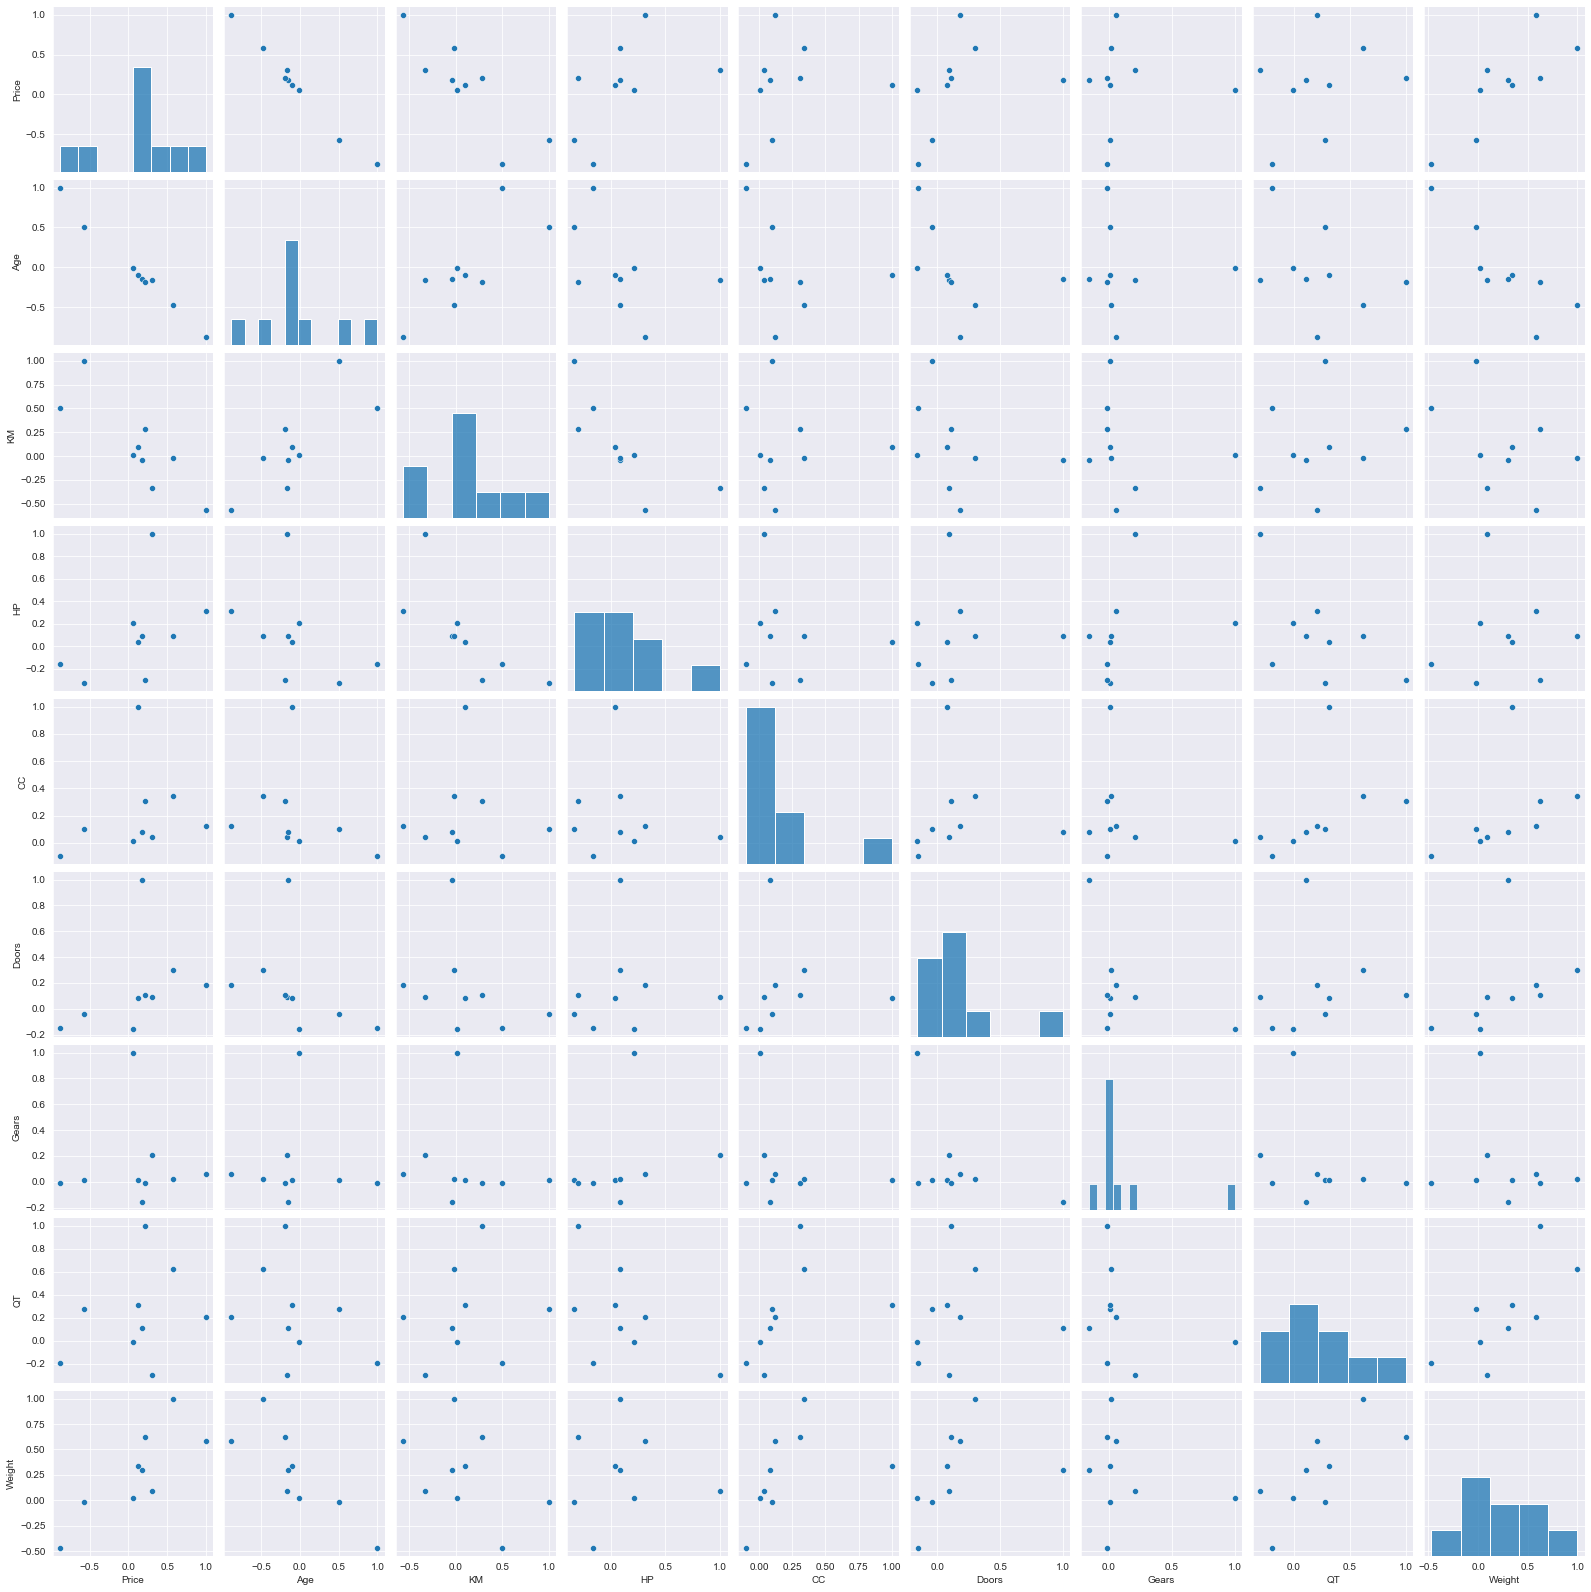

In [166]:
sns.set_style(style='darkgrid')
sns.pairplot(data2)

## Model Building

In [172]:
model=smf.ols(formula='Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit()

### Model testing

In [173]:
# Finding Coefficient parameters
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [174]:
# Finding tvalues and pvalues
model.tvalues,model.pvalues.round(5)


(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [175]:
# Finding rsquared values
model.rsquared,model.rsquared_adj # Model accuracy is 86.17

(0.8625200256947, 0.8617487495415146)

In [176]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues

In [177]:
slr_c=smf.ols('Price~CC',data=toyo4).fit()
slr_c.tvalues , slr_c.pvalues # CC has significant pvalue

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [178]:
slr_d=smf.ols('Price~Doors',data=toyo4).fit()
slr_d.tvalues , slr_d.pvalues # Doors has signifcicant pvalue

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [179]:
slr_da=smf.ols('Price~Doors+Age',data=toyo4).fit()
slr_da.tvalues , slr_da.pvalues

(Intercept    74.281185
 Doors         4.384662
 Age         -67.886956
 dtype: float64,
 Intercept    0.000000
 Doors        0.000012
 Age          0.000000
 dtype: float64)

In [180]:
slr_dahp=smf.ols('Price~Doors+Age+HP',data=toyo4).fit()
slr_dahp.tvalues , slr_dahp.pvalues

(Intercept    38.692853
 Doors         3.643431
 Age         -70.101196
 HP           15.034316
 dtype: float64,
 Intercept    9.626060e-225
 Doors         2.786401e-04
 Age           0.000000e+00
 HP            1.527146e-47
 dtype: float64)

## Model Validation Techniques
Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [181]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

In [182]:
rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit().rsquared
vif_KM=1/(1-rsq_age)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyo4)
vif_HP=1/(1-rsq_age)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyo4)
vif_CC=1/(1-rsq_age)

rsq_DR=smf.ols('Doors~Age+KM+CC+HP+Gears+QT+Weight',data=toyo4)
vif_DR=1/(1-rsq_age)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyo4).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyo4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyo4).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format

d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.876236
2,HP,1.876236
3,CC,1.876236
4,Doors,1.876236
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [183]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression

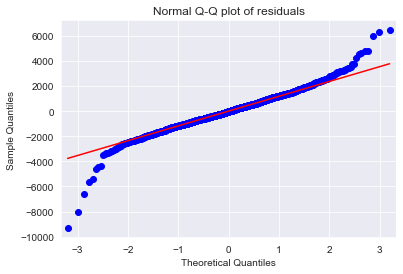

In [184]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [185]:
list(np.where(model.resid>6000))  # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [186]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

0       1.811440
1       1.650868
2       1.807763
3       1.696217
4       1.634880
          ...   
1430   -0.574865
1431   -0.724552
1432   -0.675960
1433   -0.639025
1434   -0.096920
Length: 1435, dtype: float64
0      -2.460254
1      -1.871222
2      -2.114735
3      -1.087988
4      -1.831176
          ...   
1430   -0.967265
1431    1.907560
1432    0.033306
1433   -0.993398
1434   -2.575442
Length: 1435, dtype: float64


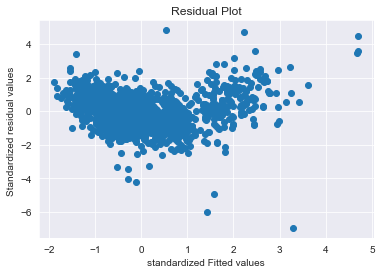

In [187]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
print(get_standardized_values(model.fittedvalues))
print(get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('standardized Fitted values')
plt.ylabel('Standardized residual values ')
plt.show()

In [188]:
model.resid.mean()

-2.305232524265006e-09

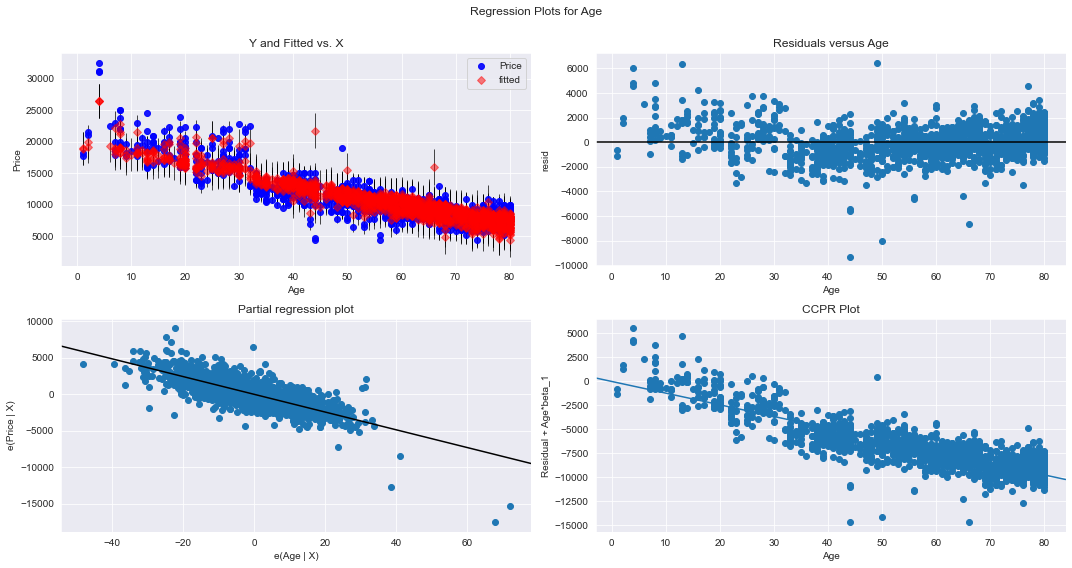

In [189]:
## RESIDUAL VS REGRESSOR
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

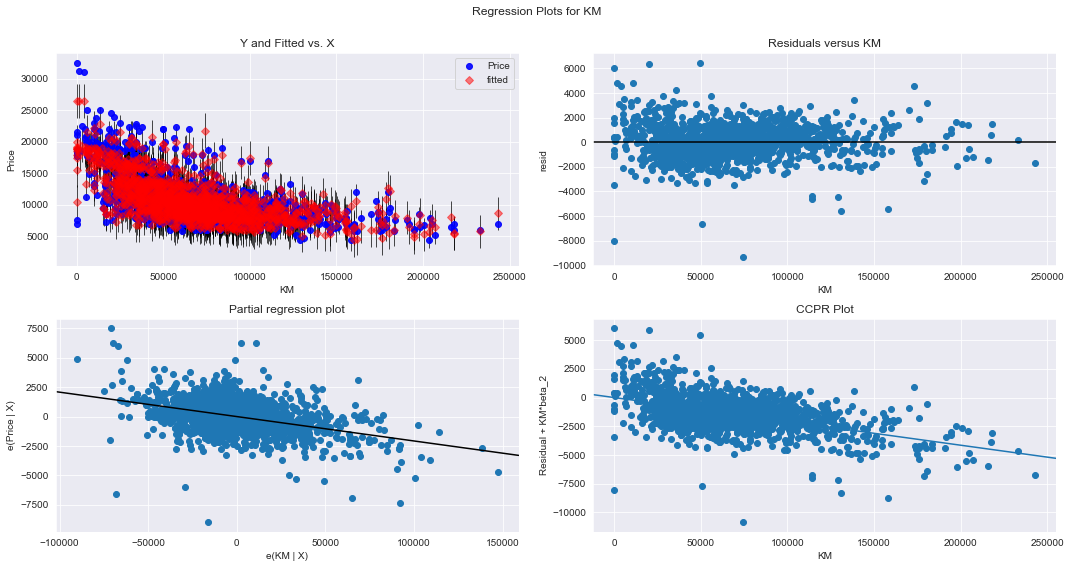

In [190]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

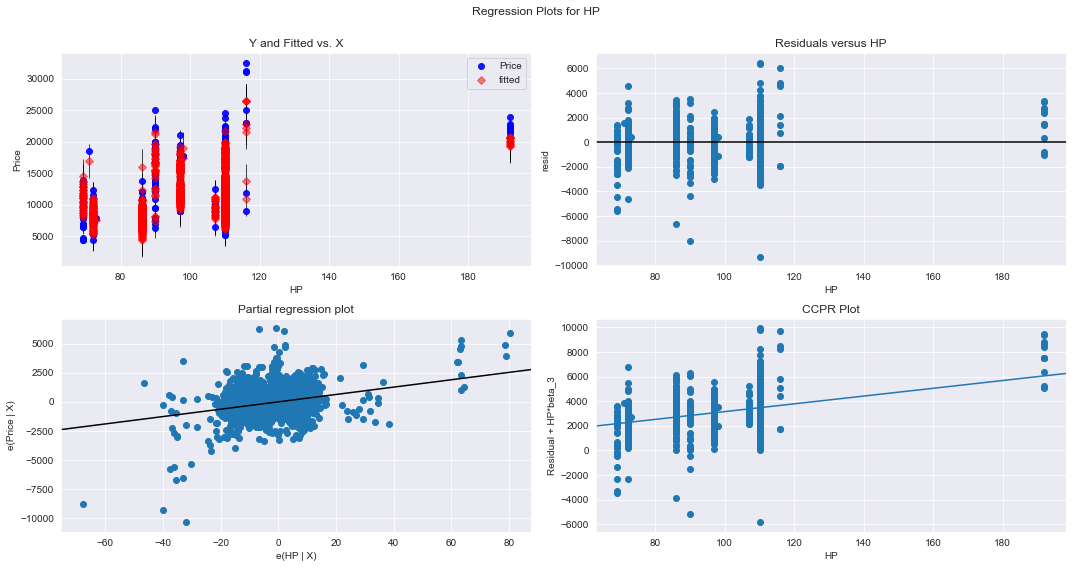

In [191]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()


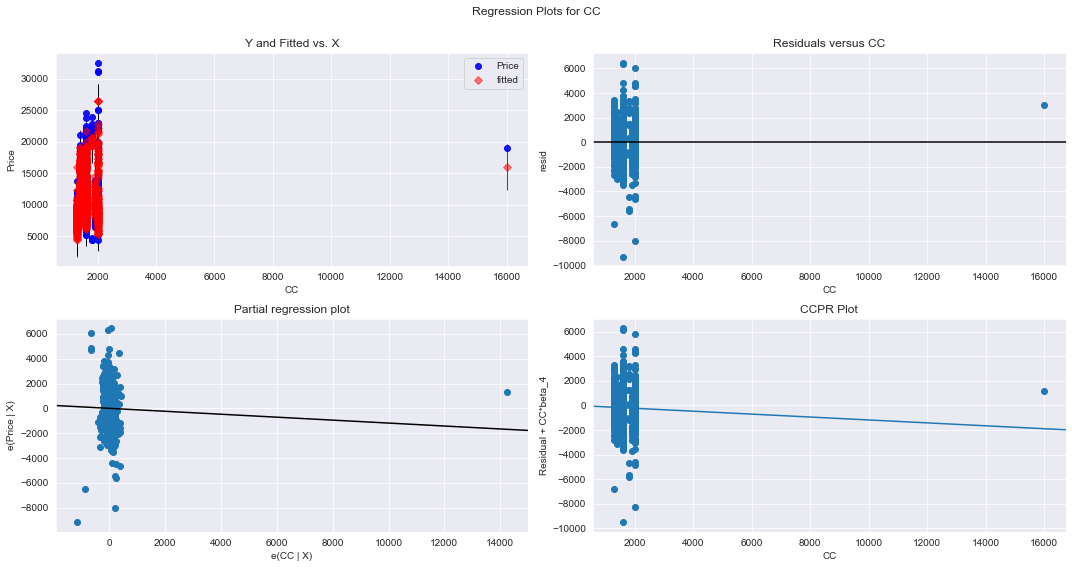

In [192]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

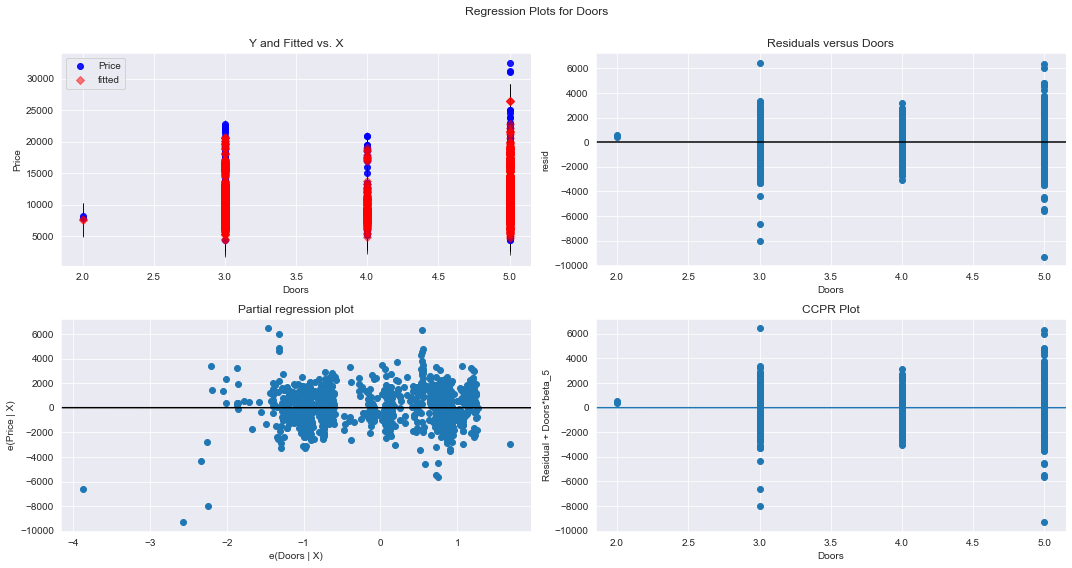

In [193]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

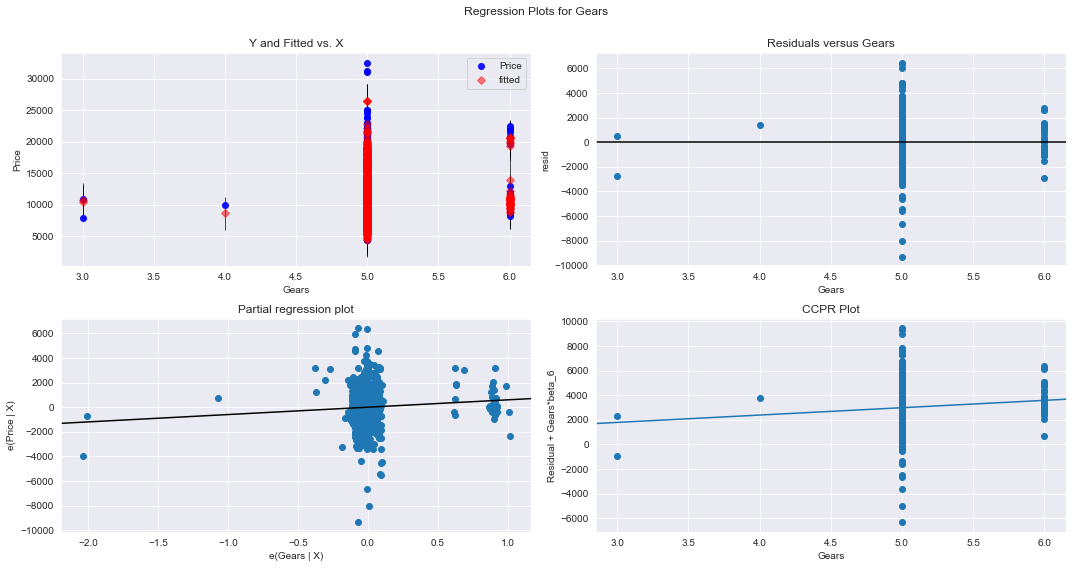

In [194]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

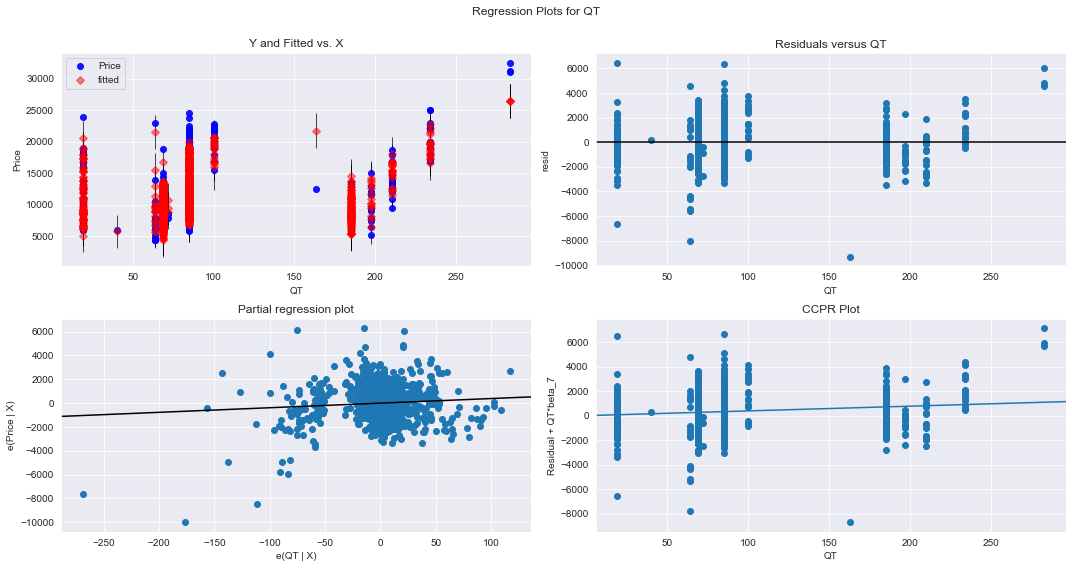

In [195]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()


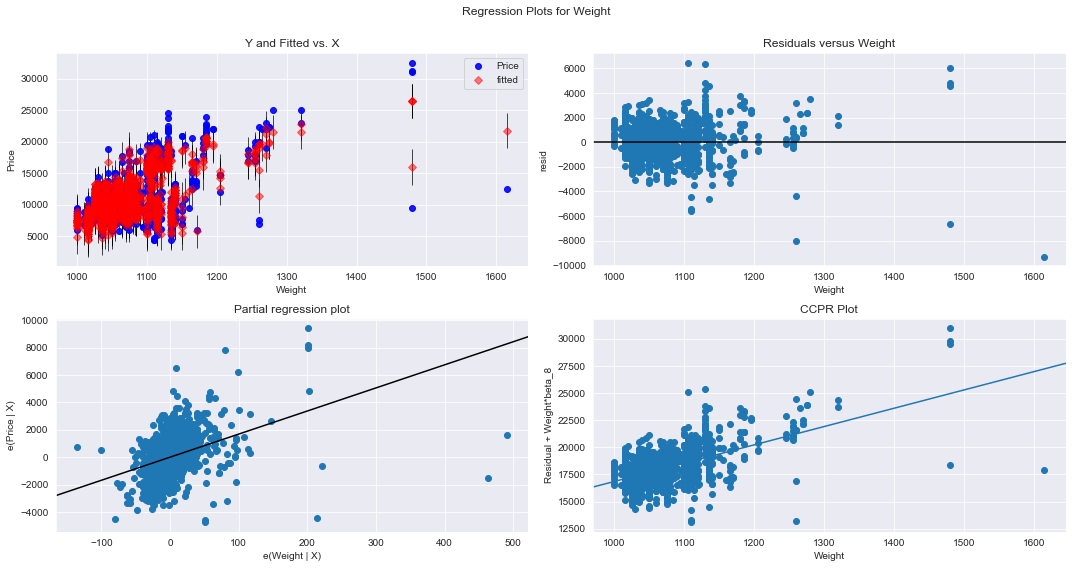

In [196]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

### Model Deletion Diagnostics (checking Outliers or Influencers)
Two Techniques : 1. Cook's Distance & 2. Leverage value


In [198]:
toyo4.shape

(1435, 9)

In [199]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

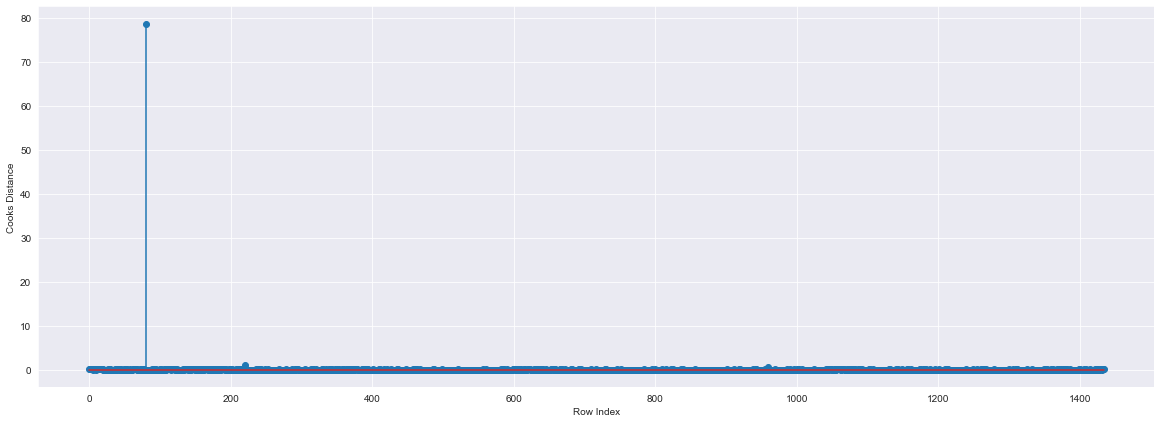

In [200]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyo4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [201]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058224851)

In [204]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=9 #columns
n=1435 #rows
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

#### point 80 is influencer

In [205]:
toyo4[toyo4.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Improving the Model

In [206]:
# Creating a copy of data so that original dataset is not affected
toyo_new=toyo4.copy()
toyo_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [207]:
#discard the influencer pint and reassign index val
toyo5=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


###  Model Deletion Diagnostics and Final Model

In [208]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo5=toyo5.drop(toyo5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo5
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [209]:
final_model.rsquared

0.8882395145171204

In [210]:
toyo5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


### Model Predictions

In [211]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [214]:
#manual prediction of price
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [213]:
#Automatic Prediction
pred_y=model.predict(toyo5)
pred_y

0       16326.634426
1       15886.220972
2       16304.093367
3       15973.237208
4       15839.043084
            ...     
1426     9114.821644
1427     8499.169594
1428     8644.902871
1429     8758.662855
1430    10638.570082
Length: 1431, dtype: float64